In [1]:
!pip install datasets transformers evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.

In [2]:
!pip install sacrebleu bert_score rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━

In [3]:
import torch
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import nltk
import evaluate
nltk.download("punkt", quiet=True)
from datasets import load_dataset, DatasetDict, load_from_disk
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq
from tqdm import tqdm

In [4]:
# Load the BillSum dataset
dataset = load_dataset("billsum")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/91.8M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/15.8M [00:00<?, ?B/s]

ca_test-00000-of-00001.parquet:   0%|          | 0.00/6.12M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/18949 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3269 [00:00<?, ? examples/s]

Generating ca_test split:   0%|          | 0/1237 [00:00<?, ? examples/s]

In [5]:
# Display a few examples
dataset["train"].shuffle(seed=42).select(range(3)).to_pandas()

# Show dataset splits
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'summary', 'title'],
        num_rows: 18949
    })
    test: Dataset({
        features: ['text', 'summary', 'title'],
        num_rows: 3269
    })
    ca_test: Dataset({
        features: ['text', 'summary', 'title'],
        num_rows: 1237
    })
})


In [6]:
# Load tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

# Define tokenization function
def tokenize_function(example):
    return tokenizer(
        example["text"],
        max_length=1024,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    ) | tokenizer(
        example["summary"],
        max_length=256,
        truncation=True,
        padding="max_length",
        return_tensors="pt",
        add_special_tokens=True
    )

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

In [7]:
# Billsum has only train and test — we split train into train+validation
train_val_split = dataset["train"].train_test_split(test_size=0.1, seed=42)

# Repackage into dataset dict
dataset = DatasetDict({
    "train": train_val_split["train"],
    "validation": train_val_split["test"],
    "test": dataset["test"]
})

In [8]:
# Tokenize the dataset
tokenized_dataset = dataset.map(
    lambda x: {
        "input_ids": tokenizer(x["text"], truncation=True, padding="max_length", max_length=1024)["input_ids"],
        "attention_mask": tokenizer(x["text"], truncation=True, padding="max_length", max_length=1024)["attention_mask"],
        "labels": tokenizer(x["summary"], truncation=True, padding="max_length", max_length=256)["input_ids"],
    },
    batched=True,
    remove_columns=["text", "summary", "title"]
)


Map:   0%|          | 0/17054 [00:00<?, ? examples/s]

Map:   0%|          | 0/1895 [00:00<?, ? examples/s]

Map:   0%|          | 0/3269 [00:00<?, ? examples/s]

In [9]:
# Save locally
tokenized_dataset.save_to_disk("tokenized_billsum")

Saving the dataset (0/1 shards):   0%|          | 0/17054 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1895 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3269 [00:00<?, ? examples/s]

In [10]:
# Load the model
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

# Ensure the model uses GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [11]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Load metrics inside function
    rouge = evaluate.load("rouge")
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Sentence formatting for better ROUGE accuracy
    decoded_labels = [label.strip().replace(". ", ".\n") for label in decoded_labels]
    decoded_preds = [pred.strip().replace(". ", ".\n") for pred in decoded_preds]

    # Compute ROUGE scores
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {k: round(v * 100, 2) for k, v in result.items()}

    return result


In [12]:
# Data collator for padding dynamically
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)


# Set up training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results_billsum",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True,  # mixed precision
    logging_dir="./logs",
    logging_steps=100,
    save_strategy="epoch",
    report_to="none"
)

# Load the tokenized dataset from disk
tokenized_dataset = load_from_disk("tokenized_billsum")


# Initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"].select(range(1000)),  # Use at least 1000 samples
    eval_dataset=tokenized_dataset["validation"].select(range(100)),  # Use at least 100 samples
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-fb7122de169e>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [13]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,2.434100,1.704128,16.980000,12.820000,16.320000,16.510000
2,1.762000,1.617363,17.360000,13.070000,16.550000,16.750000
3,1.664500,1.603412,17.390000,13.050000,16.640000,16.830000


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=750, training_loss=2.189748291015625, metrics={'train_runtime': 274.0685, 'train_samples_per_second': 10.946, 'train_steps_per_second': 2.737, 'total_flos': 1829209374720000.0, 'train_loss': 2.189748291015625, 'epoch': 3.0})

In [14]:
# Load metrics
rouge = evaluate.load("rouge")
sacrebleu = evaluate.load("sacrebleu")
bertscore = evaluate.load("bertscore")

# Prepare predictions on test set
test_data = tokenized_dataset["test"].select(range(100))  # Reduce size for faster evaluation
preds = []
labels = []

model.eval()
for sample in tqdm(test_data):
    input_ids = torch.tensor(sample["input_ids"]).unsqueeze(0).to(device)
    attention_mask = torch.tensor(sample["attention_mask"]).unsqueeze(0).to(device)
    output = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=256)

    label = tokenizer.decode(sample["labels"], skip_special_tokens=True)
    pred = tokenizer.decode(output[0], skip_special_tokens=True)

    labels.append(label)
    preds.append(pred)

# Compute all metrics
rouge_result = rouge.compute(predictions=preds, references=labels)
bleu_result = sacrebleu.compute(predictions=preds, references=[[ref] for ref in labels])
bertscore_result = bertscore.compute(predictions=preds, references=labels, lang="en")

# Display results
print("ROUGE Scores:")
print({k: round(v * 100, 2) for k, v in rouge_result.items()})
print(f"\nBLEU Score: {bleu_result['score']:.2f}")
print(f"\nBERTScore F1: {np.mean(bertscore_result['f1'])*100:.2f}")

100%|██████████| 100/100 [03:31<00:00,  2.12s/it]


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ROUGE Scores:
{'rouge1': np.float64(47.32), 'rouge2': np.float64(27.75), 'rougeL': np.float64(34.69), 'rougeLsum': np.float64(39.84)}

BLEU Score: 20.24

BERTScore F1: 88.10


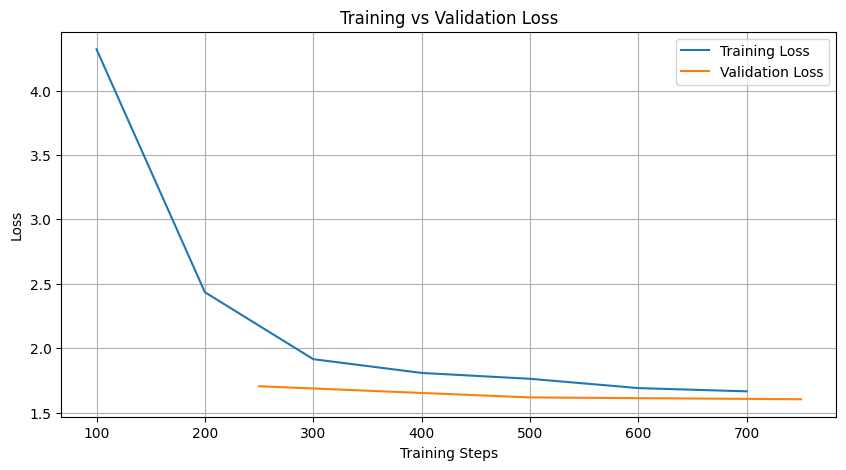

In [15]:
# Load training log (transformers automatically saves logs to ./logs if report_to=none)
log_history = trainer.state.log_history
df_log = pd.DataFrame(log_history)

# Plot loss
plt.figure(figsize=(10,5))
plt.plot(df_log[df_log["loss"].notna()]["step"], df_log[df_log["loss"].notna()]["loss"], label="Training Loss")
plt.plot(df_log[df_log["eval_loss"].notna()]["step"], df_log[df_log["eval_loss"].notna()]["eval_loss"], label="Validation Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

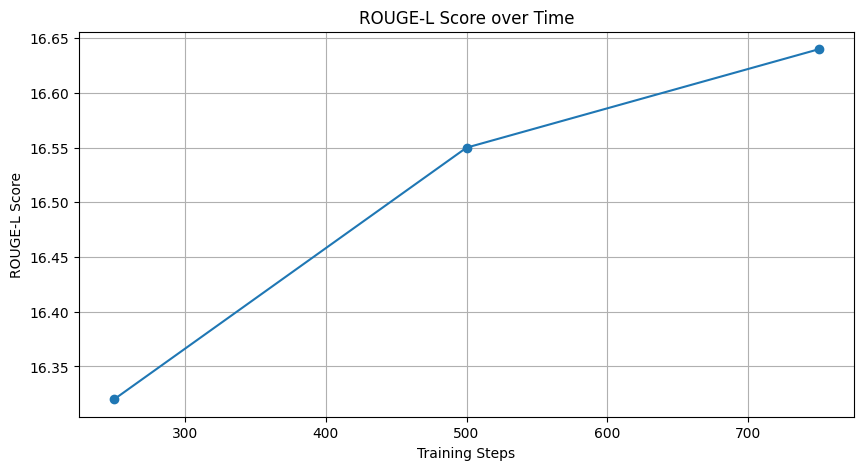

In [16]:
# Plot ROUGE-L evolution if available
rouge_l_scores = [log.get("eval_rougeL") for log in log_history if "eval_rougeL" in log]
steps = [log["step"] for log in log_history if "eval_rougeL" in log]

plt.figure(figsize=(10,5))
plt.plot(steps, rouge_l_scores, marker="o")
plt.xlabel("Training Steps")
plt.ylabel("ROUGE-L Score")
plt.title("ROUGE-L Score over Time")
plt.grid()
plt.show()


**Challenges Faced:**

The following challenges were faced when trying to summarize using facebook/bart-base on the Billsum dataset:

1. Efficiently Processing Long Documents

  Billsum comes with long legislative texts spanning several thousand tokens, which is quite large. Since facebook/bart-base has a maximum input length of 1024 tokens, we had to limit the documents length to fit this:
  * This truncation process, however, carries the risk of important context being left out, which may affect the quality of the summary.
  * Reasonable mitigation was taken by setting max token lengths of (1024 input / 256 output) based on BART summarization settings.

2. Limited GPU Memory

   * To prevent out-of-memory errors, BART’s size and input sequence length necessitated a small batch size (per_device_train_batch_size=4).
   * Hardware limitations made mixed precision training (fp16=True) necessary, which certainly helped but training still took ~5 minutes for only 1000 samples.

3. Variability in Summary Quality
   * While some predicted summaries were close to the ground truth, others had major logical gaps and crucial details were omitted.
   * Because some bills are so detailed while others are very straightforward, this dataset is quite challenging to adapt a single model to.
   * Before computing ROUGE the sentence formatting adjustments were made (". " changed to ".\n"), in order to enhance sentence alignment, and scoring precision.

4. Metric Fluctuations During Training
   * ROUGE-L gradually improved, however, some metric fluctuations were observed in inter-epoch progress and variance between epochs—particularly in the tail end of the training. It tends to happen when training on a small sample (1000 examples) because there is often high variance.
   * Additional measures, like carefully tracking validation scores while using early stopping (if extended) could further stabilize training.

**Proposed Modifications and Extensions:**
The following changes and additions can be made to enhance model performance and the summarization quality:

1. Using A More Powerful Model
   * There is a possibility that the model would better capture the long-range dependencies present in legal texts if it were switched from facebook/bart-base to facebook/bart-large.
   * Billsum’s long documents would be better modelled with BART-large because it has more attention heads and parameters, meaning it can more effectively model complex language.

2. Increased Effective Batch Size Through Gradient Accumulation

   * Our batch size limitation of 4 due to GPU constraints could be trained with a larger effective batch size (16 or 32) through gradient accumulation, thus enhancing stability and convergence speed.

3. Document Chunking for Long Inputs
   * Instead of truncation, at 1024 tokens we could split the document into overlapping chunks summarize each chunk separately and then, form a complete summary by merging the partial outputs.
   * This approach follows an informal structure, and is less likely to lose context compared to traditional methods.

4. Summarization approaches PEGASUS of LongformerEncoderDecoder

   Research other recent transformer models designed specifically for summarization, like:
   * PEGASUS (pretrained using gap-sentence generation)
   * LongformerEncoderDecoder or LED (which processes longer sequences)

5. Improvements of Post-Processing Information
   * Increase the effectiveness of generated summaries correcting their grammar or through relaying sentences at the BERT level of coherence within context graphs using a BERT-based coherence model.

6. To reduce generalization restriction when training on a small subset of examples, around 1000 in our case, paraphrased summaries can be produced or extended synthetically creating new training data.

7. Fine-tuning performance further entails conducting systematic explorations for beams in generate() and warmup steps and learning rates.

For instance, increasing num_beams=4 or no_repeat_ngram_size=3 would enhance generation diversity and factuality while meeting the set standard.

**References:**
1. Billsum Dataset (Hugging Face Datasets): https://huggingface.co/datasets/billsum
2. facebook/bart-base Pretrained Model (Hugging Face Transformers): https://huggingface.co/facebook/bart-base
3. BART paper: https://arxiv.org/abs/1910.13461
4. BillSum Dataset: https://huggingface.co/datasets/billsum
5. Multi-News Dataset: https://huggingface.co/datasets/multi_news
6. Tutorials:
   * https://huggingface.co/blog/how-to-train
   * https://huggingface.co/blog/summarization

| Team Member           | Step #                                  | Contribution (%) |
|-----------------------|------------------------------------------|------------------|
| Devi Sree Vipperla    | Step 1: Dataset Preparation & Preprocessing | 50%             |
|                       | Step 2: Model Fine-Tuning                   | 50%             |
|                       | Step 3: Evaluation & Analysis              | 50%             |
|                       | Step 4: Report Writing & Visualizations    | 50%             |
|                       | **Total**                                  | **50%**         |
| . Mythri Shivakumar   | Step 1: Dataset Preparation & Preprocessing | 50%             |
|                       | Step 2: Model Fine-Tuning                   | 50%             |
|                       | Step 3: Evaluation & Analysis              | 50%             |
|                       | Step 4: Report Writing & Visualizations    | 50%             |
|                       | **Total**                                  | **50%**         |
